<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Convolutional Neural Networks with Keras</font></h1>

In this lab, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item41">Import Keras and Packages</a>   
2. <a href="#item42">Convolutional Neural Network with One Convolutional and Pooling Layers</a>  
3. <a href="#item43">Convolutional Neural Network with Two Convolutional and Pooling Layers</a>  

</font>
</div>

<a id='item41'></a>

## Import Keras and Packages

Let's start by importing the keras libraries and the packages that we would need to build a neural network.

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


When working with convolutional neural networks in particular, we will need additional packages.

In [2]:
from keras.layers.convolutional import Conv2D       # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten                    # to flatten data for fully connected layers

<a id='item42'></a>

## Convolutional Layer with One set of convolutional and pooling layers

In [3]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Let's normalize the pixel values to be between 0 and 1

In [4]:
X_train /= 255 # normalize training data
X_test /= 255  # normalize test data

Next, let's convert the target variable into binary categories

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.

In [6]:
def convolutional_model(inp_shape=(28, 28, 1)):
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=inp_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Finally, let's call the function to create the model, and then let's train it and evaluate it.

In [7]:
# build the model
model = convolutional_model()
model.summary()

W0321 11:09:00.805154 139896656893760 deprecation_wrapper.py:119] From /home/pascal/Projects/ML_DL/anaconda3/envs/tensorflow_keras_gpuenv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               230500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 231,926
Trainable params: 231,926
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, 
          batch_size=200, 
          verbose=1)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

W0321 11:09:28.233310 139896656893760 deprecation_wrapper.py:119] From /home/pascal/Projects/ML_DL/anaconda3/envs/tensorflow_keras_gpuenv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2882 - accuracy: 0.9209 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 2/10
 - 1s - loss: 0.0774 - accuracy: 0.9777 - val_loss: 0.0623 - val_accuracy: 0.9802
Epoch 3/10
 - 1s - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0493 - val_accuracy: 0.9838
Epoch 4/10
 - 1s - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.0534 - val_accuracy: 0.9827
Epoch 5/10
 - 1s - loss: 0.0342 - accuracy: 0.9897 - val_loss: 0.0468 - val_accuracy: 0.9854
Epoch 6/10
 - 1s - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.0445 - val_accuracy: 0.9854
Epoch 7/10
 - 1s - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0369 - val_accuracy: 0.9872
Epoch 8/10
 - 1s - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0394 - val_accuracy: 0.9869
Epoch 9/10
 - 1s - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0395 - val_accuracy: 0.9865
Epoch 10/10
 - 1s - loss: 0.0134 - accuracy: 0.9963 - val_loss: 0.0368 - val_accuracy: 0.9885
Accuracy: 0.9884999

<a id='item43'></a>

## Convolutional Layer with two sets of convolutional and pooling layers

Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.

In [9]:
def convolutional_model(inp_shape=(28, 28, 1)):
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=inp_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.

In [10]:
# build the model
model = convolutional_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 8)         520       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [11]:
# fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=16, 
                    batch_size=200, 
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 1s 23us/step - loss: 0.5051 - accuracy: 0.8583 - val_loss: 0.1337 - val_accuracy: 0.9611
Epoch 2/16
60000/60000 [==============================] - 1s 19us/step - loss: 0.1177 - accuracy: 0.9647 - val_loss: 0.0805 - val_accuracy: 0.9752
Epoch 3/16
60000/60000 [==============================] - 1s 19us/step - loss: 0.0840 - accuracy: 0.9750 - val_loss: 0.0633 - val_accuracy: 0.9795
Epoch 4/16
60000/60000 [==============================] - 1s 19us/step - loss: 0.0675 - accuracy: 0.9799 - val_loss: 0.0562 - val_accuracy: 0.9810
Epoch 5/16
60000/60000 [==============================] - 1s 19us/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0498 - val_accuracy: 0.9850
Epoch 6/16
60000/60000 [==============================] - 1s 20us/step - loss: 0.0520 - accuracy: 0.9839 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 7/16
60000/60000 [==============================] - 1s 20us/st

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

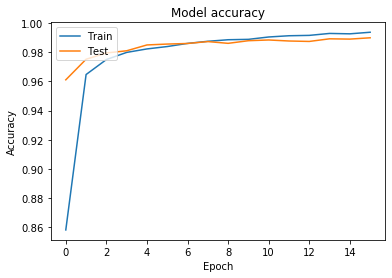

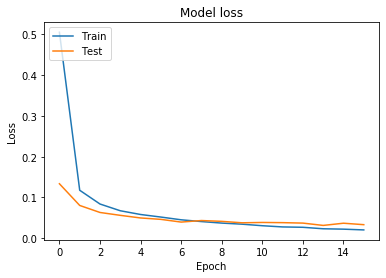

In [14]:
import matplotlib.pyplot as plt 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy on test set: {} \n Error: {}".format(scores[1], 100 - scores[1]*100))

Accuracy: 0.9898999929428101 
 Error: 1.0100007057189941


### Using Early stopping callback

In [17]:
class myCallback(keras.callbacks.Callback):
  
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

            
# No dropout 
def convolutional_model(inp_shape=(28, 28, 1)):
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=inp_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [18]:
callback = myCallback()
model = convolutional_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 8)         520       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [19]:
# fit the model with callback
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    callbacks=[callback],
                    epochs=32, 
                    batch_size=128, 
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 2s 27us/step - loss: 0.3613 - accuracy: 0.8931 - val_loss: 0.1212 - val_accuracy: 0.9619
Epoch 2/32
60000/60000 [==============================] - 1s 24us/step - loss: 0.1023 - accuracy: 0.9689 - val_loss: 0.0789 - val_accuracy: 0.9767
Epoch 3/32
60000/60000 [==============================] - 2s 25us/step - loss: 0.0762 - accuracy: 0.9765 - val_loss: 0.0615 - val_accuracy: 0.9818
Epoch 4/32
60000/60000 [==============================] - 2s 27us/step - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.0692 - val_accuracy: 0.9785
Epoch 5/32
60000/60000 [==============================] - 1s 23us/step - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.0511 - val_accuracy: 0.9841
Epoch 6/32
60000/60000 [==============================] - 2s 26us/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0516 - val_accuracy: 0.9843
Epoch 7/32
60000/60000 [==============================] - 1s 24us/st

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

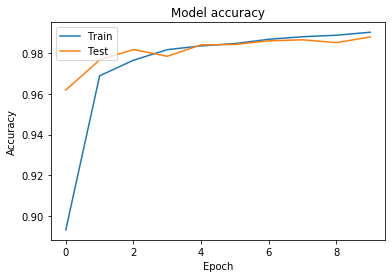

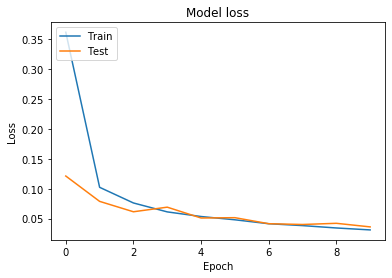

In [21]:
import matplotlib.pyplot as plt 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy on test set: {} \n Error: {}".format(scores[1], 100 - scores[1]*100))

Accuracy on test set: 0.9879999756813049 
 Error: 1.2000024318695068


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!

This notebook is part of a course on **Coursera** called *Introduction to Deep Learning & Neural Networks with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).